# **Objective:**


Your task is to scrap images of first page, show them, and apply transformation (histogram+ Linear+ Geometric Operations).

# **1. Scrape an RGB image from a target webpage**

Visit 

https://www.scrapethissite.com/pages/frames/

Extract an image file (.png or .jpg) programmatically.

Save it locally .png or .jpeg based on the type of image files.

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from bs4 import BeautifulSoup
import urllib.parse
import os
from urllib.parse import urljoin
import re

In [9]:
def scrape_single_image(base_url):
    """
    Scrapes a website to extract one image from frames/iframes
    """
    # Headers to avoid 403 errors
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'Accept-Encoding': 'gzip, deflate',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1',
    }
    
    try:
       
        response = requests.get(base_url, headers=headers)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.content, 'html.parser')
        frames = soup.find_all(['frame', 'iframe'])
        all_image_urls = []
        main_images = soup.find_all('img')
        for img in main_images:
            src = img.get('src')
            if src:
                full_url = urljoin(base_url, src)
                all_image_urls.append(full_url)
        
        
        for frame in frames:
            frame_src = frame.get('src')
            if frame_src:
                
                if 'frame=' in frame_src and '?' not in frame_src:
                    frame_src = frame_src.replace('frame=', '?frame=')
            
                frame_url = urljoin(base_url, frame_src)
                print(f"Found frame: {frame_url}")
                
                try:
                    
                    frame_response = requests.get(frame_url, headers=headers)
                    frame_response.raise_for_status()
                    
                    frame_soup = BeautifulSoup(frame_response.content, 'html.parser')
                    frame_images = frame_soup.find_all('img')
                    for img in frame_images:
                        img_src = img.get('src')
                        if img_src:
                            
                            full_img_url = urljoin(frame_url, img_src)
                            all_image_urls.append(full_img_url)
                
                except Exception as e:
                    print(f"Error accessing frame {frame_url}: {e}")
        
        
        unique_image_urls = list(set(all_image_urls))
        if not unique_image_urls:
            print("No images found on the website")
            return None
        
        selected_image_url = unique_image_urls[0]
        print(f"Found {len(unique_image_urls)} unique images")
        print(f"Selected image: {selected_image_url}")
        
        img_response = requests.get(selected_image_url, headers=headers)
        img_response.raise_for_status()
    
        parsed_url = urllib.parse.urlparse(selected_image_url)
        filename = os.path.basename(parsed_url.path)
        if not filename or '.' not in filename:
            content_type = img_response.headers.get('content-type', '')
            if 'jpeg' in content_type or 'jpg' in content_type:
                filename = 'scraped_image.jpg'
            elif 'png' in content_type:
                filename = 'scraped_image.png'
            elif 'gif' in content_type:
                filename = 'scraped_image.gif'
            else:
                filename = 'scraped_image.jpg'
        
        
        with open(filename, 'wb') as f:
            f.write(img_response.content)
        print(f"Image saved as: {filename}")
        print(f"Image size: {len(img_response.content)} bytes")        
        return {
            'filename': filename,
            'url': selected_image_url,
            'size': len(img_response.content),
            'total_images_found': len(unique_image_urls)
        }
        
    except Exception as e:
        print(f"Error scraping website: {e}")
        return None

if __name__ == "__main__":
    url = "https://www.scrapethissite.com/pages/frames/"
    print("Starting image scraping...")
    result = scrape_single_image(url)
    
    if result:
        print("\n=== Scraping Results ===")
        print(f"Downloaded: {result['filename']}")
        print(f"Source URL: {result['url']}")
        print(f"File size: {result['size']} bytes")
        print(f"Total images found: {result['total_images_found']}")
    else:
        print("Failed to scrape any images")

Starting image scraping...
Found frame: https://www.scrapethissite.com/pages/frames/?frame=top
Found frame: https://www.scrapethissite.com/pages/frames/?frame=main
Found frame: https://www.scrapethissite.com/pages/frames/?frame=bottom
Found frame: https://www.scrapethissite.com/pages/frames/?frame=i
Found 17 unique images
Selected image: https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/GreenSeaTurtle-2.jpg/200px-GreenSeaTurtle-2.jpg
Image saved as: 200px-GreenSeaTurtle-2.jpg
Image size: 18478 bytes

=== Scraping Results ===
Downloaded: 200px-GreenSeaTurtle-2.jpg
Source URL: https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/GreenSeaTurtle-2.jpg/200px-GreenSeaTurtle-2.jpg
File size: 18478 bytes
Total images found: 17


In [10]:
img_pil = Image.open(r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\New folder\200px-GreenSeaTurtle-2.jpg")
img_np = np.array(img_pil)
print(f"PIL Image format : {img_pil.format}, size: {img_pil.size}, mode: {img_pil.mode}")

PIL Image format : JPEG, size: (200, 150), mode: RGB


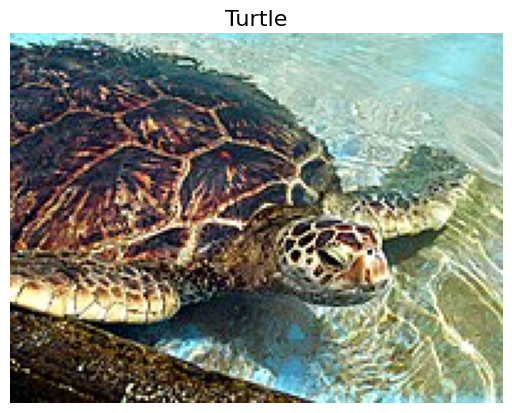

In [11]:
plt.imshow(img_pil)
plt.title('Turtle', fontsize=16)
plt.axis('off')
plt.show()

# **2. Advanced Histogram Analysis**

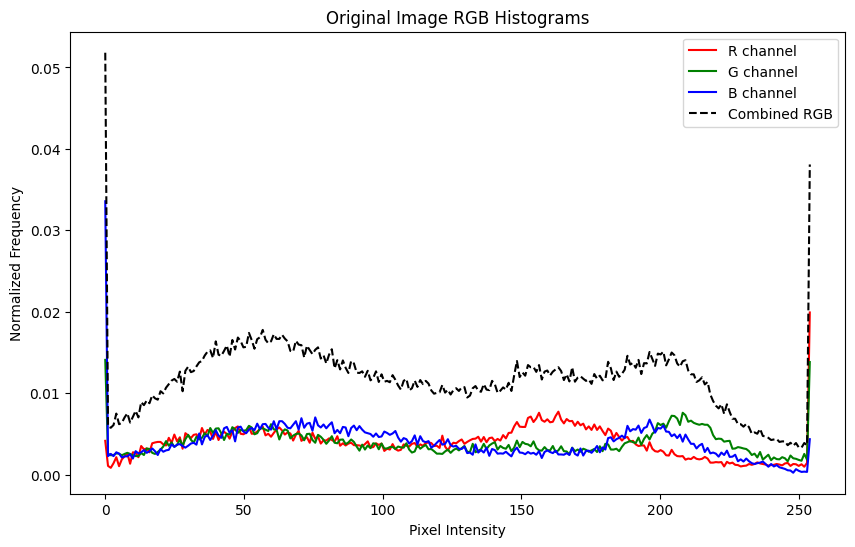

In [24]:
def plot_rgb_histograms(image, title='RGB Histograms'):
    colors = ('r','g','b')
    plt.figure(figsize=(10,6))
    bins = 256
    for i, color in enumerate(colors):
        hist, bin_edges = np.histogram(image[:,:,i], bins=bins, range=(0,255), density=True)
        plt.plot(bin_edges[0:-1], hist, color=color, label=f'{color.upper()} channel')
        
    combined_hist = np.zeros(bins)
    for i in range(3):
        hist, _ = np.histogram(image[:,:,i], bins=bins, range=(0,255), density=True)
        combined_hist += hist

    plt.plot(bin_edges[0:-1], combined_hist, color='k', linestyle='--', label='Combined RGB')

    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Frequency')
    plt.legend()
    plt.show()

plot_rgb_histograms(img_np, 'Original Image RGB Histograms')


# **3. Perform Multiple Intensity Transformations**

In [13]:
def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_image = c * np.log(1 + image.astype(np.float64))
    return np.array(np.clip(log_image, 0, 255), dtype=np.uint8)

def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype('uint8')
    return cv2.LUT(image, table)

def contrast_stretching(image, min_val=50, max_val=200):
    
    stretched = (image - min_val) * (255.0 / (max_val - min_val))
    stretched = np.clip(stretched, 0, 255)
    return stretched.astype(np.uint8)


In [14]:
log_img = log_transform(img_np)
gamma_img_1 = gamma_correction(img_np, gamma=0.5)
gamma_img_2 = gamma_correction(img_np, gamma=2.0)
contrast_img = contrast_stretching(img_np, min_val=50, max_val=200)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_16340\2865757559.py:2: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(image))
C:\Users\bbuser\AppData\Local\Temp\ipykernel_16340\2865757559.py:2: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(image))


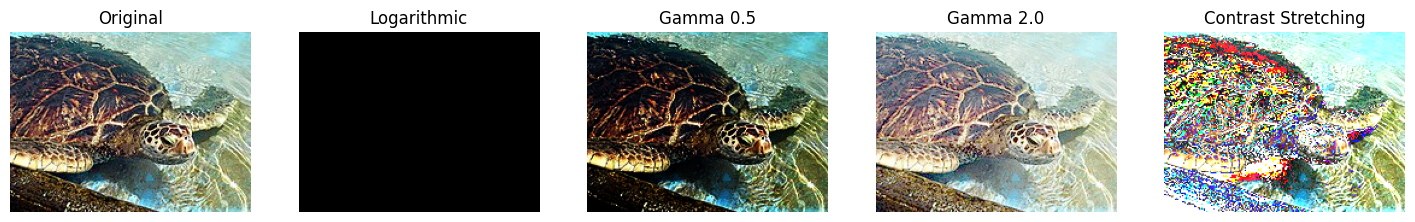

In [15]:
def show_images(images, titles):
    n = len(images)
    plt.figure(figsize=(18,6))
    for i in range(n):
        plt.subplot(1,n,i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

show_images([img_np, log_img, gamma_img_1, gamma_img_2, contrast_img],
            ['Original', 'Logarithmic', 'Gamma 0.5', 'Gamma 2.0', 'Contrast Stretching'])

# **4. Apply Histogram Equalization**

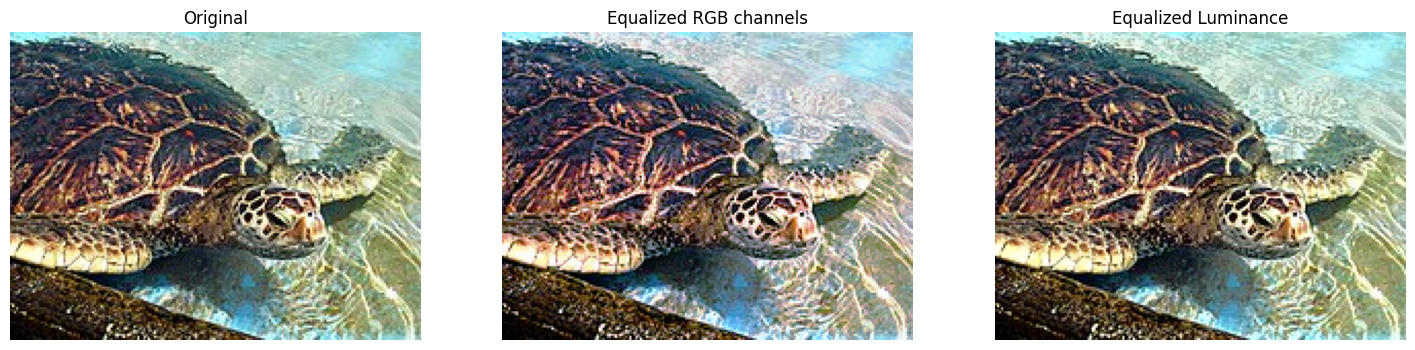

In [16]:
def equalize_rgb_channels(image):
    eq_channels = []
    for i in range(3):
        eq_channels.append(cv2.equalizeHist(image[:,:,i]))
    return cv2.merge(eq_channels)

def equalize_luminance(image):
    ycrcb = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    y, cr, cb = cv2.split(ycrcb)

    y_eq = cv2.equalizeHist(y)

    ycrcb_eq = cv2.merge([y_eq, cr, cb])
    img_eq = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2RGB)
    return img_eq

eq_rgb_img = equalize_rgb_channels(img_np)
eq_luminance_img = equalize_luminance(img_np)

show_images([img_np, eq_rgb_img, eq_luminance_img], ['Original', 'Equalized RGB channels', 'Equalized Luminance'])


# **5. Thresholding and Segmentation**

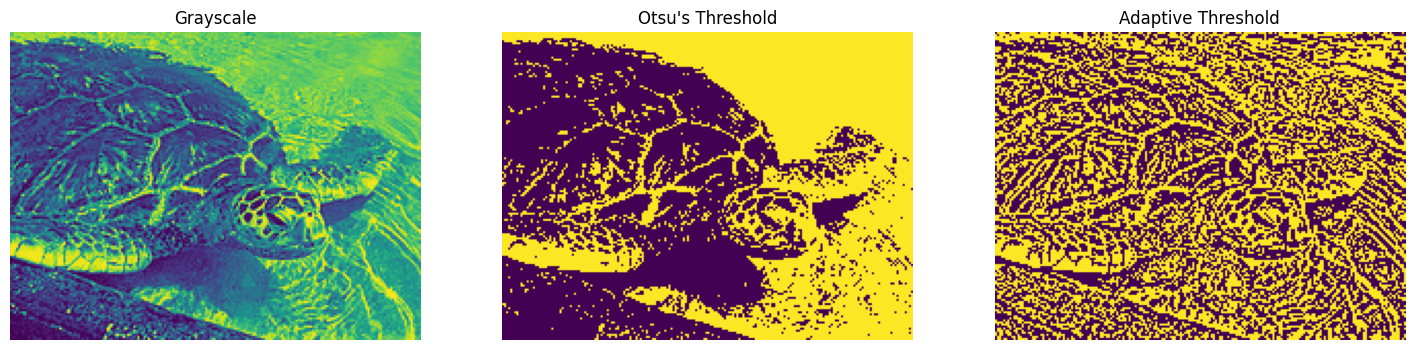

In [17]:
gray_img = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# Otsu's thresholding
_, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_img, 255,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)

show_images([gray_img, otsu_thresh, adaptive_thresh], ['Grayscale', "Otsu's Threshold", 'Adaptive Threshold'])


# **6. Visualization Layout**

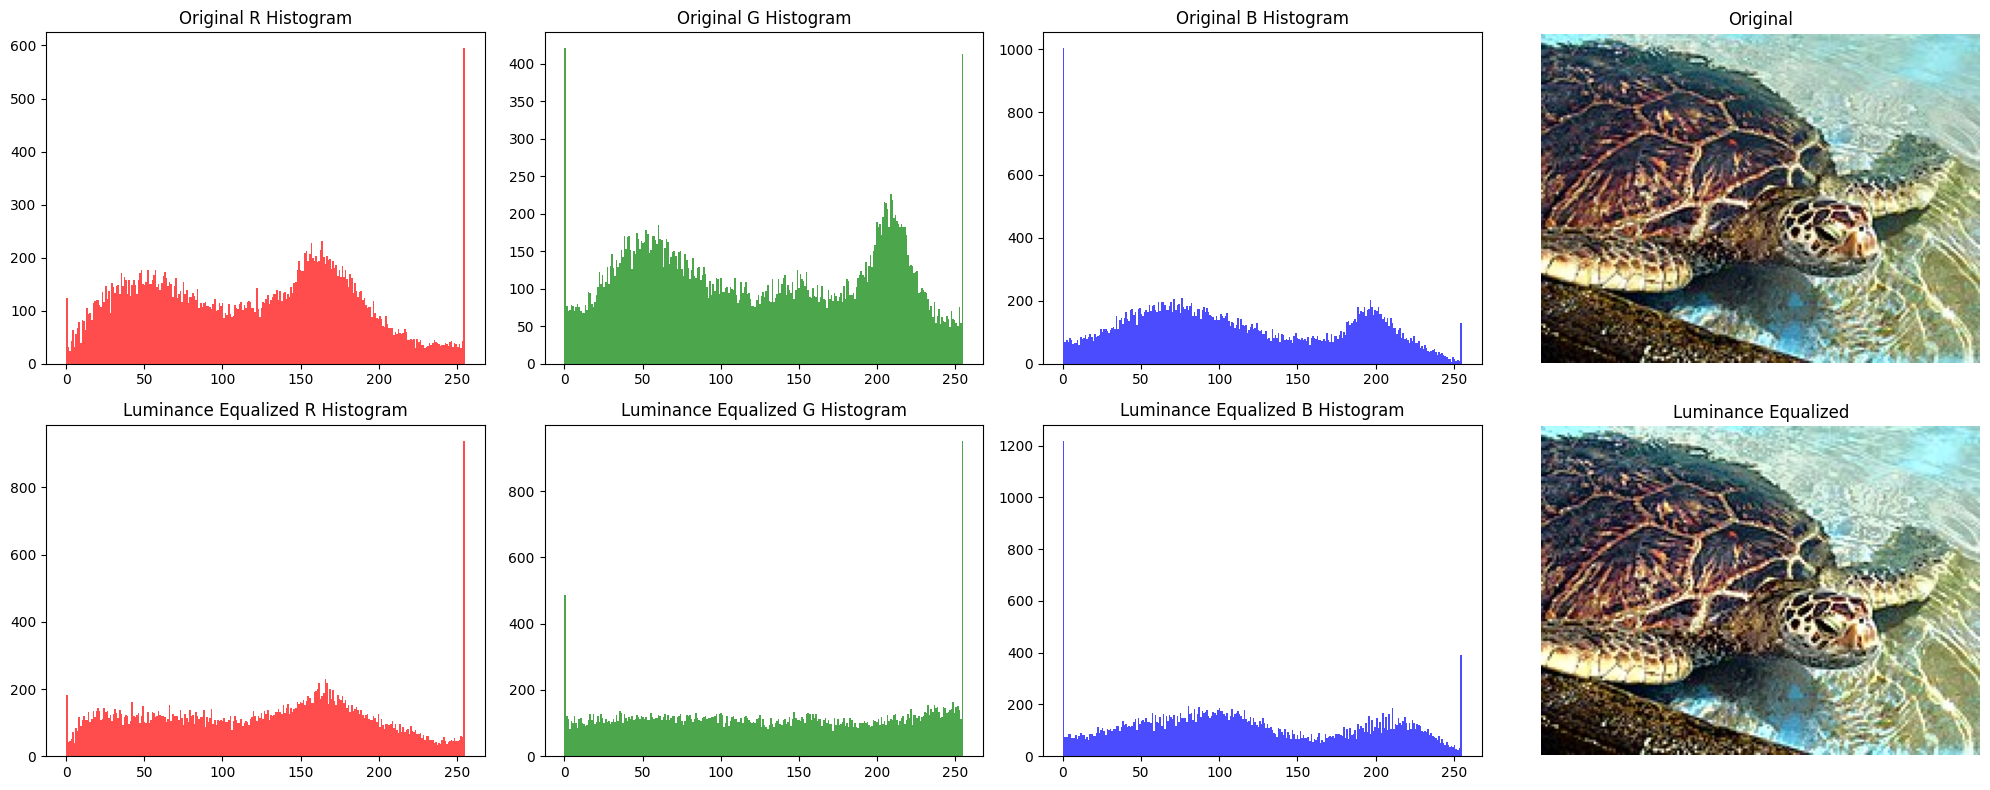

In [18]:
def plot_histograms_comparison(original, transformed, title1='Original', title2='Transformed'):
    fig, axs = plt.subplots(2, 4, figsize=(20,8))
    colors = ('r','g','b')
    bins = 256

    for i, color in enumerate(colors):
        axs[0,i].hist(original[:,:,i].ravel(), bins=bins, color=color, alpha=0.7)
        axs[0,i].set_title(f'{title1} {color.upper()} Histogram')
        axs[1,i].hist(transformed[:,:,i].ravel(), bins=bins, color=color, alpha=0.7)
        axs[1,i].set_title(f'{title2} {color.upper()} Histogram')

    axs[0,3].imshow(original)
    axs[0,3].set_title(title1)
    axs[0,3].axis('off')

    axs[1,3].imshow(transformed)
    axs[1,3].set_title(title2)
    axs[1,3].axis('off')

    plt.tight_layout()
    plt.show()

plot_histograms_comparison(img_np, eq_luminance_img, 'Original', 'Luminance Equalized')


# **7. Interactive Gamma Slider (using matplotlib widget)**

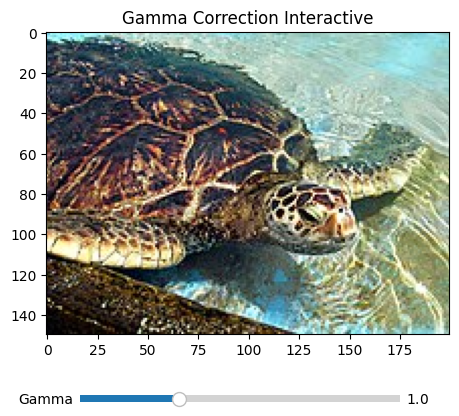

In [19]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)
l_img = ax.imshow(img_np)
ax.set_title('Gamma Correction Interactive')

ax_gamma = plt.axes([0.25, 0.1, 0.50, 0.03])
gamma_slider = Slider(ax_gamma, 'Gamma', 0.1, 3.0, valinit=1, valstep=0.01)

def update(val):
    gamma = gamma_slider.val
    corrected = gamma_correction(img_np, gamma)
    l_img.set_data(corrected)
    fig.canvas.draw_idle()

gamma_slider.on_changed(update)
plt.show()
